Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

- Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
- Did people become happier from 2012 to 2014? Compute results for each country in the sample.
- Who reported watching more TV in 2012, men or women?
- Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
- Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
- Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [5]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [6]:
#drop the nulls

df = df.dropna()

Some of the data here is really confusing. Let's clean it up to make it easier to interpret.

In [7]:
#categories are numeric, change to names

df['partner'] = df['partner'].map({1: 'yes', 2: 'no'})

In [8]:
df['year'] = df['year'].map({6: 2012, 7: 2014})

In [9]:
df['gndr'] = df['gndr'].map({1: 'male', 2: 'female'})

In [10]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,female,60.0,yes
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,female,59.0,yes
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,male,24.0,no
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,female,64.0,yes
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,female,55.0,yes


... that's better

In [11]:
#what countries are represented here?

df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

- CH = Switzerland
- CZ = Czech Republic
- DE = Denmark
- ES = Spain
- NO = Norway
- SE = Sweden

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

The ppltrst variable is measured on a scale of 0 to 10. 0 representing 'you can't be too careful' to 10 'most people can be trusted'.

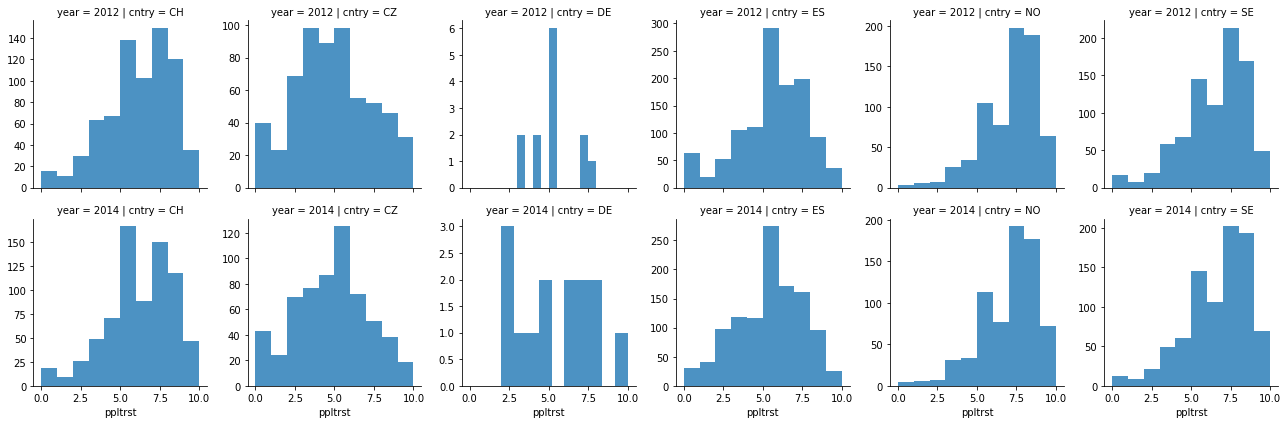

In [12]:
#histograms of trust for each country for each year
trust = sns.FacetGrid(df, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
trust = trust.map(plt.hist, 'ppltrst', alpha=0.8)
plt.tight_layout()
plt.show()

In [13]:
#test for normality

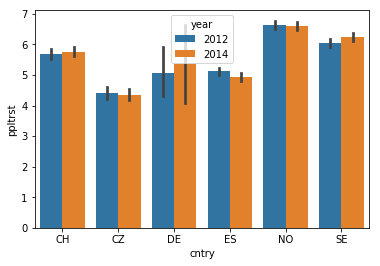

In [14]:
sns.barplot(x='cntry', y='ppltrst', hue='year', data=df)

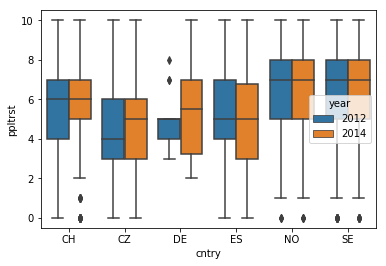

In [15]:
sns.boxplot(x='cntry', y='ppltrst', hue='year', data=df)

People became more trusting in CH, DE and SE from 2012 to 2014. People became less trusting in CZ, ES and NO in the same years.

In [16]:
countries = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

for country in countries:
    ppltrst_2012 = df[(df['year']=='2012') & (df['cntry']==country)]['ppltrst']
    ppltrst_2014 = df[(df['year']=='2014') & (df['cntry']==country)]['ppltrst']
    
    print(country)
    print(stats.ttest_ind(ppltrst_2012, ppltrst_2014))
    print('---------------')

    

CH
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
CZ
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
DE
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
ES
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
NO
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
SE
Ttest_indResult(statistic=nan, pvalue=nan)
---------------


C:\Users\kylem\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


As can be seen from the t test, there are significant changes in ES and SE from 2012 to 2014. The visuals above show ES became less trusting and SE more trusting.

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

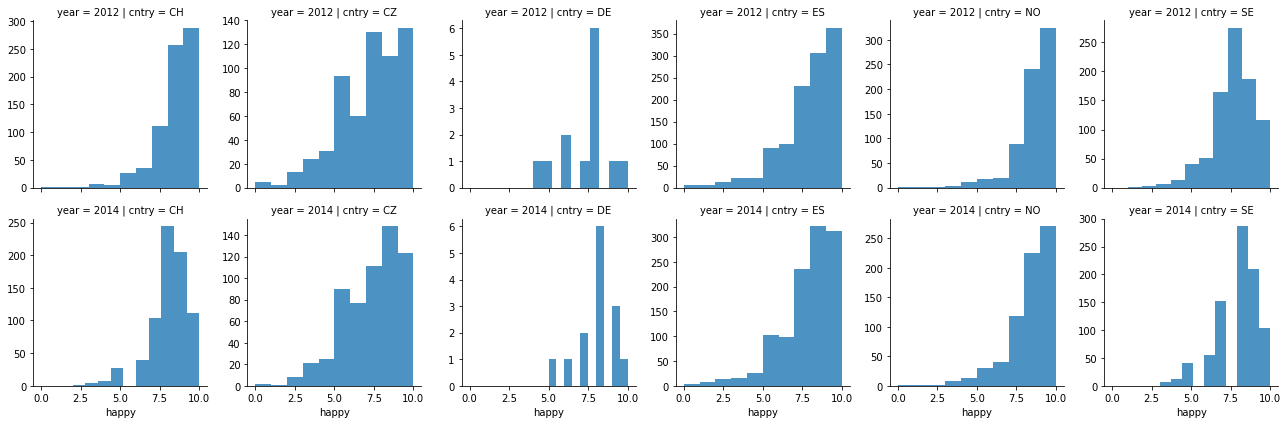

In [17]:
#histograms of happiness for each country for each year
happy = sns.FacetGrid(df, row='year', col='cntry', sharey=False)
happy = happy.map(plt.hist, 'happy', alpha=0.8)
plt.tight_layout()
plt.show()

In [18]:
#test for normality 

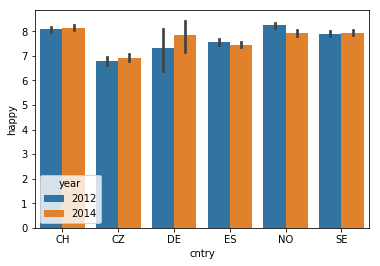

In [19]:
sns.barplot(x='cntry', y='happy', hue='year', data=df)

People became happier in CH, CZ, DE, and SE from 2012 to 2014. People seemed to become less happy in ES and NO.

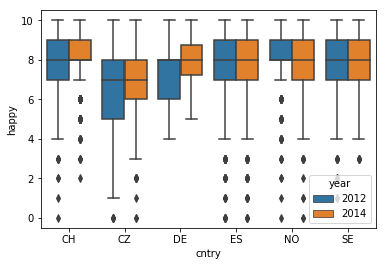

In [20]:
sns.boxplot(x='cntry', y='happy', hue='year', data=df)

In [21]:
countries = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

for country in countries:
    ppltrst_2012 = df[(df['year']=='2012') & (df['cntry']==country)]['happy']
    ppltrst_2014 = df[(df['year']=='2014') & (df['cntry']==country)]['happy']
    
    print(country)
    print(stats.ttest_ind(ppltrst_2012, ppltrst_2014))
    print('---------------')

CH
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
CZ
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
DE
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
ES
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
NO
Ttest_indResult(statistic=nan, pvalue=nan)
---------------
SE
Ttest_indResult(statistic=nan, pvalue=nan)
---------------


The only country with significant change is NO, which became less happy over the course of these two years.

## 3. Who reported watching more TV in 2012, men or women?

In [24]:
df2012 = df[(df['year']==2012)]

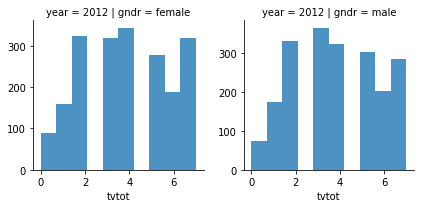

In [25]:
#histograms of happiness for each country for each year
tv = sns.FacetGrid(df2012, row='year', col='gndr', sharey=False)
tv = tv.map(plt.hist, 'tvtot', alpha=0.8)
plt.tight_layout()
plt.show()

In [ ]:
df2012.groupby(['cntry', 'gndr'])['tvtot'].mean().plot.bar()

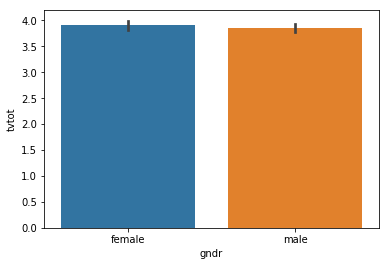

In [26]:
sns.barplot(x='gndr', y='tvtot', data=df2012)

In [33]:
men = df2012[(df2012['gndr']=='male')]
women = df2012[(df2012['gndr']=='female')]

In [34]:
print(stats.ttest_ind(men['tvtot'], women['tvtot']))

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)


No significant difference in tv viewing between women and men.

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

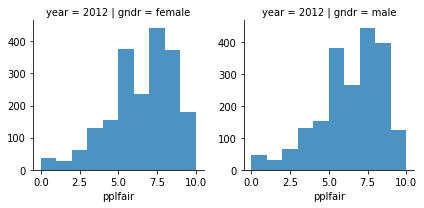

In [35]:
#histograms of happiness for each country for each year
fairness = sns.FacetGrid(df2012, row='year', col='gndr', sharey=False)
fairness = fairness.map(plt.hist, 'pplfair', alpha=0.8)
plt.tight_layout()
plt.show()

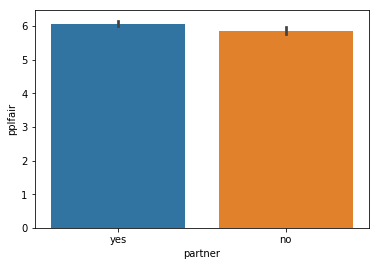

In [38]:
sns.barplot(x='partner', y='pplfair', data=df2012)

In [39]:
single = df2012[(df2012['partner']=='no')]
partner = df2012[(df2012['partner']=='yes')]

In [40]:
print(stats.ttest_ind(single['pplfair'], partner['pplfair']))

Ttest_indResult(statistic=-3.0430439318464235, pvalue=0.002356936676939248)


People who live with their partners are more likely to believe other people were fair in 2012.

## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [45]:
df_2014 = df[(df['year']==2014)]

countries = df_2014[df_2014['cntry'].isin(['CH', 'DE', 'NO', 'CZ'])]

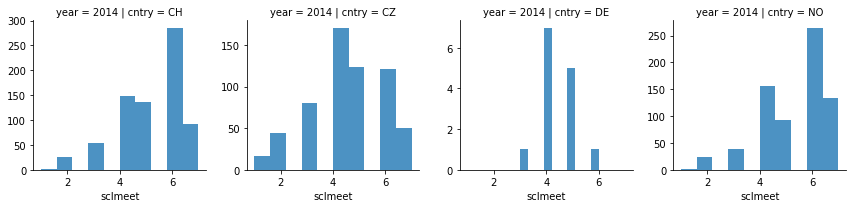

In [46]:
social = sns.FacetGrid(countries, row='year', col='cntry',sharey=False)
social = social.map(plt.hist, 'sclmeet', alpha=0.8)

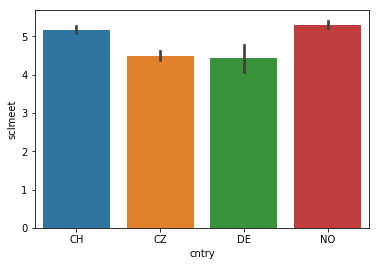

In [47]:
sns.barplot(x='cntry', y='sclmeet', data=countries)

In [48]:
ch = countries[countries['cntry'] == 'CH'].sclmeet
cz = countries[countries['cntry'] == 'CZ'].sclmeet
de = countries[countries['cntry'] == 'DE'].sclmeet
no = countries[countries['cntry'] == 'NO'].sclmeet

In [51]:
print(kruskal(ch, cz, de, no))

KruskalResult(statistic=123.89201139064286, pvalue=1.1197400327056421e-26)


The Kruskal test is showing that our groups differ significantly.

In [57]:
print('Switzerland vs Czech Republic')
print(stats.ttest_ind(ch, cz))
print('Switzerland vs Denmark')
print(stats.ttest_ind(ch, de))
print('Switzerland vs Norway')
print(stats.ttest_ind(ch, no))

print('Czech Republic vs Denmark')
print(stats.ttest_ind(cz, de))
print('Czech Republic vs Norway')
print(stats.ttest_ind(cz, no))

print('Denmark vs Norway')
print(stats.ttest_ind(de, no))


Switzerland vs Czech Republic
Ttest_indResult(statistic=8.998568888102158, pvalue=7.58694000913212e-19)
Switzerland vs Denmark
Ttest_indResult(statistic=2.137774079859156, pvalue=0.032855611686425916)
Switzerland vs Norway
Ttest_indResult(statistic=-1.9524600649137105, pvalue=0.05107541004946689)
Czech Republic vs Denmark
Ttest_indResult(statistic=0.16846066305094798, pvalue=0.8662760053993819)
Czech Republic vs Norway
Ttest_indResult(statistic=-10.507796823715257, pvalue=7.427021134307074e-25)
Denmark vs Norway
Ttest_indResult(statistic=-2.4461487954484564, pvalue=0.014676088277028506)


In [58]:
#summarize

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [59]:
countries['agea'].describe()

count    2075.000000
mean       46.070361
std        17.952521
min        15.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        94.000000
Name: agea, dtype: float64

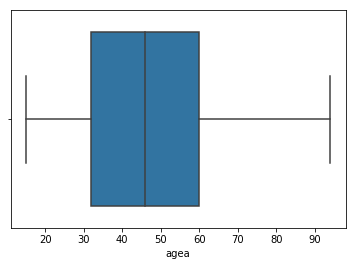

In [60]:
sns.boxplot(countries['agea'])

In [64]:
age_bins= [15,34,53,71,90,(countries['agea'].max()+1)]


age_labels = ['15-33', '34-52', '53-70', '71-89', '90+']
countries['age_groups'] = pd.cut(countries['agea'], bins=age_bins, labels=age_labels, right=False)

C:\Users\kylem\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [65]:
countries.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,age_groups
773,CH,5.0,2014,2.0,8.0,9.0,7.0,9.0,6.0,4.0,male,69.0,yes,53-70
774,CH,25.0,2014,4.0,4.0,2.0,5.0,6.0,5.0,3.0,male,30.0,yes,15-33
775,CH,26.0,2014,3.0,8.0,8.0,6.0,8.0,7.0,5.0,female,49.0,no,34-52
776,CH,28.0,2014,2.0,7.0,7.0,5.0,9.0,6.0,2.0,male,51.0,yes,34-52
777,CH,29.0,2014,2.0,4.0,7.0,0.0,8.0,6.0,2.0,female,32.0,no,15-33


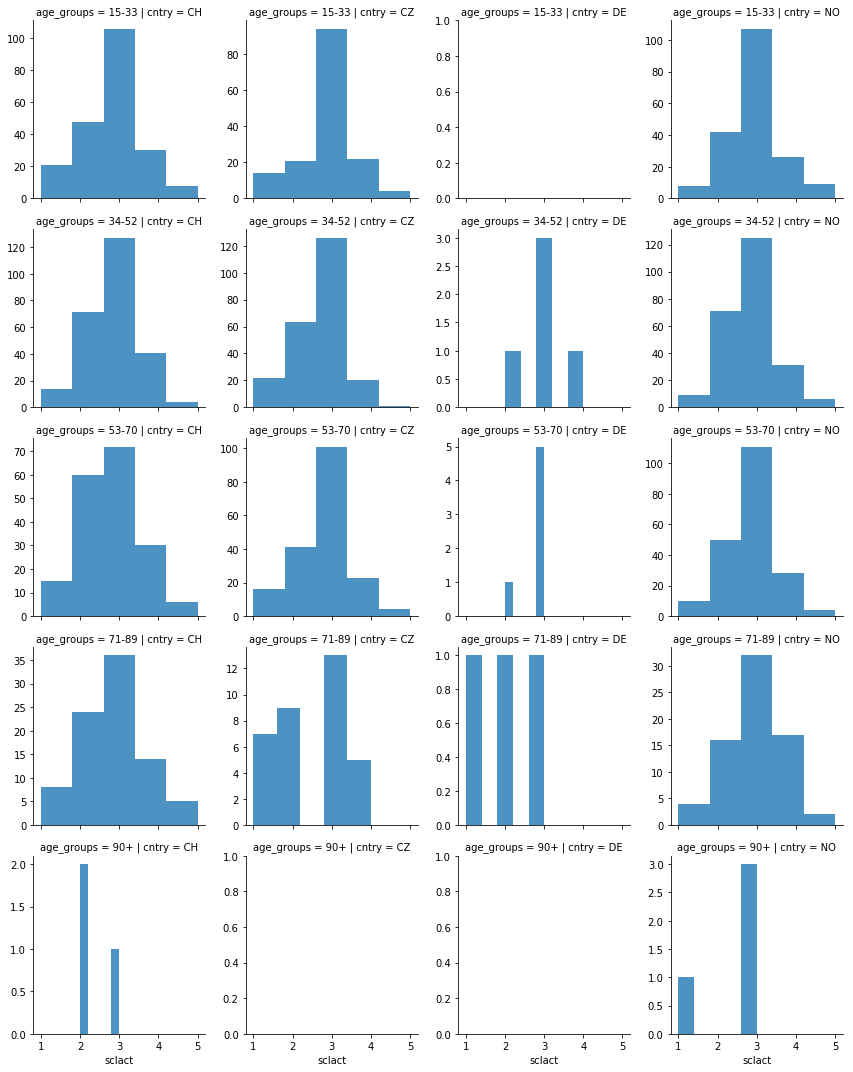

In [69]:
activities = sns.FacetGrid(countries, row='age_groups', col='cntry',sharey=False)
activities = activities.map(plt.hist, 'sclact', alpha=0.8, bins=5)

In [76]:
bin_one = countries[countries['age_groups'] == '15-33']
bin_two = countries[countries['age_groups'] == '34-52']
bin_three = countries[countries['age_groups'] == '53-70']
bin_four = countries[countries['age_groups'] == '71-89']
bin_five = countries[countries['age_groups'] == '90+']

print("Age Group 15-33:")
print('CZ vs CH:', stats.ttest_ind(bin_one[bin_one.cntry == 'CZ'].sclact,
                             bin_one[bin_one.cntry=='CH'].sclact))
print('CZ vs NO:', stats.ttest_ind(bin_one[bin_one.cntry == 'CZ'].sclact,
                             bin_one[bin_one.cntry=='NO'].sclact))
print('CZ vs DE:', stats.ttest_ind(bin_one[bin_one.cntry == 'CZ'].sclact,
                             bin_one[bin_one.cntry=='DE'].sclact))
print('\n')
print('CH vs DE:', stats.ttest_ind(bin_one[bin_one.cntry == 'CH'].sclact,
                             bin_one[bin_one.cntry=='DE'].sclact))
print('CH vs NO:', stats.ttest_ind(bin_one[bin_one.cntry == 'CH'].sclact,
                             bin_one[bin_one.cntry=='NO'].sclact))
print('\n')
print('NO vs DE:', stats.ttest_ind(bin_one[bin_one.cntry == 'NO'].sclact,
                             bin_one[bin_one.cntry=='DE'].sclact))
print('\n')
print("Age Group 34-52:")
print('CZ vs CH:', stats.ttest_ind(bin_two[bin_two.cntry == 'CZ'].sclact,
                             bin_two[bin_two.cntry=='CH'].sclact))
print('CZ vs NO:', stats.ttest_ind(bin_two[bin_two.cntry == 'CZ'].sclact,
                             bin_two[bin_two.cntry=='NO'].sclact))
print('CZ vs DE:', stats.ttest_ind(bin_two[bin_two.cntry == 'CZ'].sclact,
                             bin_two[bin_two.cntry=='DE'].sclact))
print('\n')
print('CH vs DE:', stats.ttest_ind(bin_two[bin_two.cntry == 'CH'].sclact,
                             bin_two[bin_two.cntry=='DE'].sclact))
print('CH vs NO:', stats.ttest_ind(bin_two[bin_two.cntry == 'CH'].sclact,
                             bin_two[bin_two.cntry=='NO'].sclact))
print('\n')
print('NO vs DE:', stats.ttest_ind(bin_two[bin_two.cntry == 'NO'].sclact,
                             bin_two[bin_two.cntry=='DE'].sclact))

print('\n')
print('Age Group 53-70:')
print('CZ vs CH:', stats.ttest_ind(bin_three[bin_three.cntry == 'CZ'].sclact,
                             bin_three[bin_three.cntry=='CH'].sclact))
print('CZ vs NO:', stats.ttest_ind(bin_three[bin_three.cntry == 'CZ'].sclact,
                             bin_three[bin_three.cntry=='NO'].sclact))
print('CZ vs DE:', stats.ttest_ind(bin_three[bin_three.cntry == 'CZ'].sclact,
                             bin_three[bin_three.cntry=='DE'].sclact))
print('\n')
print('CH vs DE:', stats.ttest_ind(bin_three[bin_three.cntry == 'CH'].sclact,
                             bin_three[bin_three.cntry=='DE'].sclact))
print('CH vs NO:', stats.ttest_ind(bin_three[bin_three.cntry == 'CH'].sclact,
                             bin_three[bin_three.cntry=='NO'].sclact))
print('\n')
print('NO vs DE:', stats.ttest_ind(bin_three[bin_three.cntry == 'NO'].sclact,
                             bin_three[bin_three.cntry=='DE'].sclact))
print('\n')
print('Age Group 71-89:')
print('CZ vs CH:', stats.ttest_ind(bin_four[bin_four.cntry == 'CZ'].sclact,
                             bin_four[bin_four.cntry=='CH'].sclact))
print('CZ vs NO:', stats.ttest_ind(bin_four[bin_four.cntry == 'CZ'].sclact,
                             bin_four[bin_four.cntry=='NO'].sclact))
print('CZ vs DE:', stats.ttest_ind(bin_four[bin_four.cntry == 'CZ'].sclact,
                             bin_four[bin_four.cntry=='DE'].sclact))
print('\n')
print('CH vs DE:', stats.ttest_ind(bin_four[bin_four.cntry == 'CH'].sclact,
                             bin_four[bin_four.cntry=='DE'].sclact))
print('CH vs NO:', stats.ttest_ind(bin_four[bin_four.cntry == 'CH'].sclact,
                             bin_four[bin_four.cntry=='NO'].sclact))
print('\n')
print('NO vs DE:', stats.ttest_ind(bin_four[bin_four.cntry == 'NO'].sclact,
                             bin_four[bin_four.cntry=='DE'].sclact))
print('\n')

Age Group 15-33:
CZ vs CH: Ttest_indResult(statistic=0.882282558371881, pvalue=0.3782031063929464)
CZ vs NO: Ttest_indResult(statistic=-0.5428545680998248, pvalue=0.5875804612729371)
CZ vs DE: Ttest_indResult(statistic=nan, pvalue=nan)


CH vs DE: Ttest_indResult(statistic=nan, pvalue=nan)
CH vs NO: Ttest_indResult(statistic=-1.5074881768862323, pvalue=0.1324690544443235)


NO vs DE: Ttest_indResult(statistic=nan, pvalue=nan)


Age Group 34-52:
CZ vs CH: Ttest_indResult(statistic=-2.3475186797017704, pvalue=0.019298318715364346)
CZ vs NO: Ttest_indResult(statistic=-2.4183328533542117, pvalue=0.015969305522966583)
CZ vs DE: Ttest_indResult(statistic=-1.0288567846219665, pvalue=0.3046047606753274)


CH vs DE: Ttest_indResult(statistic=-0.5232778442468491, pvalue=0.6012265965352216)
CH vs NO: Ttest_indResult(statistic=-0.06147150938749058, pvalue=0.9510084155463124)


NO vs DE: Ttest_indResult(statistic=-0.5285003053563753, pvalue=0.5976305464319029)


Age Group 53-70:
CZ vs CH: Ttest_ind

Age Groups:

- 15-33 - No significant differences
- 34-52 - Czech Republic and Norway, and Czech Republic and Switzerland show significant differences.
- 53-70 - No significant differences
- 71-89 - Significant differences between Czech Republic and Switzerland, and Czech Republic and Norway. Norway vs Denmark shows some strong difference as well.